# Creating a logistic regression to predict absenteeism

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np

## Load the data

In [2]:
data_preprocessed = pd.read_csv('Absenteeism_preprocessed.csv')

In [3]:
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pet,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


## Create the targets

In [4]:
data_preprocessed['Absenteeism Time in Hours'].median()

3.0

In [5]:
targets = np.where(data_preprocessed['Absenteeism Time in Hours'] > 
                   data_preprocessed['Absenteeism Time in Hours'].median(), 1, 0)

In [6]:
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [7]:
data_preprocessed['Excessive Absenteeism'] = targets

In [8]:
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pet,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


## A comment on the targets

In [9]:
targets.sum() / targets.shape[0]

0.45571428571428574

In [10]:
data_with_targets = data_preprocessed.drop(['Absenteeism Time in Hours','Day of the Week',
                                            'Daily Work Load Average','Distance to Work'],axis=1)

In [11]:
data_with_targets is data_preprocessed

False

In [12]:
data_with_targets.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pet,Excessive Absenteeism
0,0,0,0,1,7,289,33,30,0,2,1,1
1,0,0,0,0,7,118,50,31,0,1,0,0
2,0,0,0,1,7,179,38,31,0,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0,1
4,0,0,0,1,7,289,33,30,0,2,1,0


## Select the inputs for the regression

In [13]:
data_with_targets.shape

(700, 12)

In [14]:
data_with_targets.iloc[:,:14]

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pet,Excessive Absenteeism
0,0,0,0,1,7,289,33,30,0,2,1,1
1,0,0,0,0,7,118,50,31,0,1,0,0
2,0,0,0,1,7,179,38,31,0,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0,1
4,0,0,0,1,7,289,33,30,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,179,40,22,1,2,0,1
696,1,0,0,0,5,225,28,24,0,1,2,0
697,1,0,0,0,5,330,28,25,1,0,0,1
698,0,0,0,1,5,235,32,25,1,0,0,0


In [15]:
data_with_targets.iloc[:,:-1]

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pet
0,0,0,0,1,7,289,33,30,0,2,1
1,0,0,0,0,7,118,50,31,0,1,0
2,0,0,0,1,7,179,38,31,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0
4,0,0,0,1,7,289,33,30,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,179,40,22,1,2,0
696,1,0,0,0,5,225,28,24,0,1,2
697,1,0,0,0,5,330,28,25,1,0,0
698,0,0,0,1,5,235,32,25,1,0,0


In [16]:
unscaled_inputs = data_with_targets.iloc[:,:-1]

## Standardize the data

In [17]:
from sklearn.preprocessing import StandardScaler

absenteeism_scaler = StandardScaler()

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        self.scaler = StandardScaler(copy,with_mean,with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [19]:
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pet'], dtype=object)

In [20]:
#columns_to_scale = ['Month Value','Day of the Week', 'Transportation Expense', 'Distance to Work',
       #'Age', 'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pet']

columns_to_omit = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Education']

In [21]:
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [22]:
absenteeism_scaler = CustomScaler(columns_to_scale)

TypeError: __init__() takes 1 positional argument but 4 were given

In [23]:
absenteeism_scaler.fit(unscaled_inputs)

StandardScaler()

In [24]:
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)

In [25]:
scaled_inputs

array([[-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
         0.88046927,  0.26848661],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.01928035, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.91902997, -0.58968976],
       ...,
       [ 1.73205081, -0.09298136, -0.31448545, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.01928035,  0.26848661]])

In [26]:
scaled_inputs.shape

(700, 11)

## Split the data into train & test and shuffle

### Import the relevant module

In [27]:
from sklearn.model_selection import train_test_split

### Split

In [28]:
train_test_split(scaled_inputs, targets)

[array([[-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
         -0.91902997, -0.58968976],
        [ 1.73205081, -0.09298136, -0.31448545, ...,  2.23224237,
         -0.91902997, -0.58968976],
        [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
         -0.91902997, -0.58968976],
        ...,
        [ 1.73205081, -0.09298136, -0.31448545, ..., -0.44798003,
         -0.91902997, -0.58968976],
        [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
         -0.01928035, -0.58968976],
        [-0.57735027, -0.09298136,  3.17979734, ...,  2.23224237,
         -0.91902997, -0.58968976]]),
 array([[-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
         -0.91902997, -0.58968976],
        [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
         -0.01928035,  1.12666297],
        [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
          0.88046927,  0.26848661],
        ...,
        [-0.57735027, -0.09298136,  3.17979734, ..., -

In [29]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, #train_size = 0.8, 
                                                                            test_size = 0.2, random_state = 20)

In [30]:
print (x_train.shape, y_train.shape)

(560, 11) (560,)


In [31]:
print (x_test.shape, y_test.shape)

(140, 11) (140,)


## Modelling

### Train Model

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [33]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import model_selection

# Define models
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('K-Nearest Neighbors', KNeighborsClassifier()))
models.append(('XGBoost', xgb.XGBClassifier()))

# Prepare results containers
acc_results = []
auc_results = []
names = []

# Define columns for the results dataframe
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

# Assume X_train and y_train are already defined
# Example: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Evaluate model with k-fold Cross Validation
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)  # 10-fold Cross Validation
    cv_acc_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    cv_auc_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='roc_auc')
    
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name, round(cv_auc_results.mean()*100, 2),
                            round(cv_auc_results.std()*100, 2),
                            round(cv_acc_results.mean()*100, 2),
                            round(cv_acc_results.std()*100, 2)]
    i += 1

# Sort the results by 'ROC AUC Mean' in descending order
model_results.sort_values(by=['ROC AUC Mean'], ascending=False, inplace=True)

# Display the results
model_results

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,81.40,6.56,77.50,6.20
3,K-Nearest Neighbors,79.77,6.26,74.64,4.71
4,XGBoost,79.23,5.35,74.82,4.48
1,Random Forest,78.23,5.43,73.39,2.82
2,Decision Tree,71.92,4.86,71.96,3.66


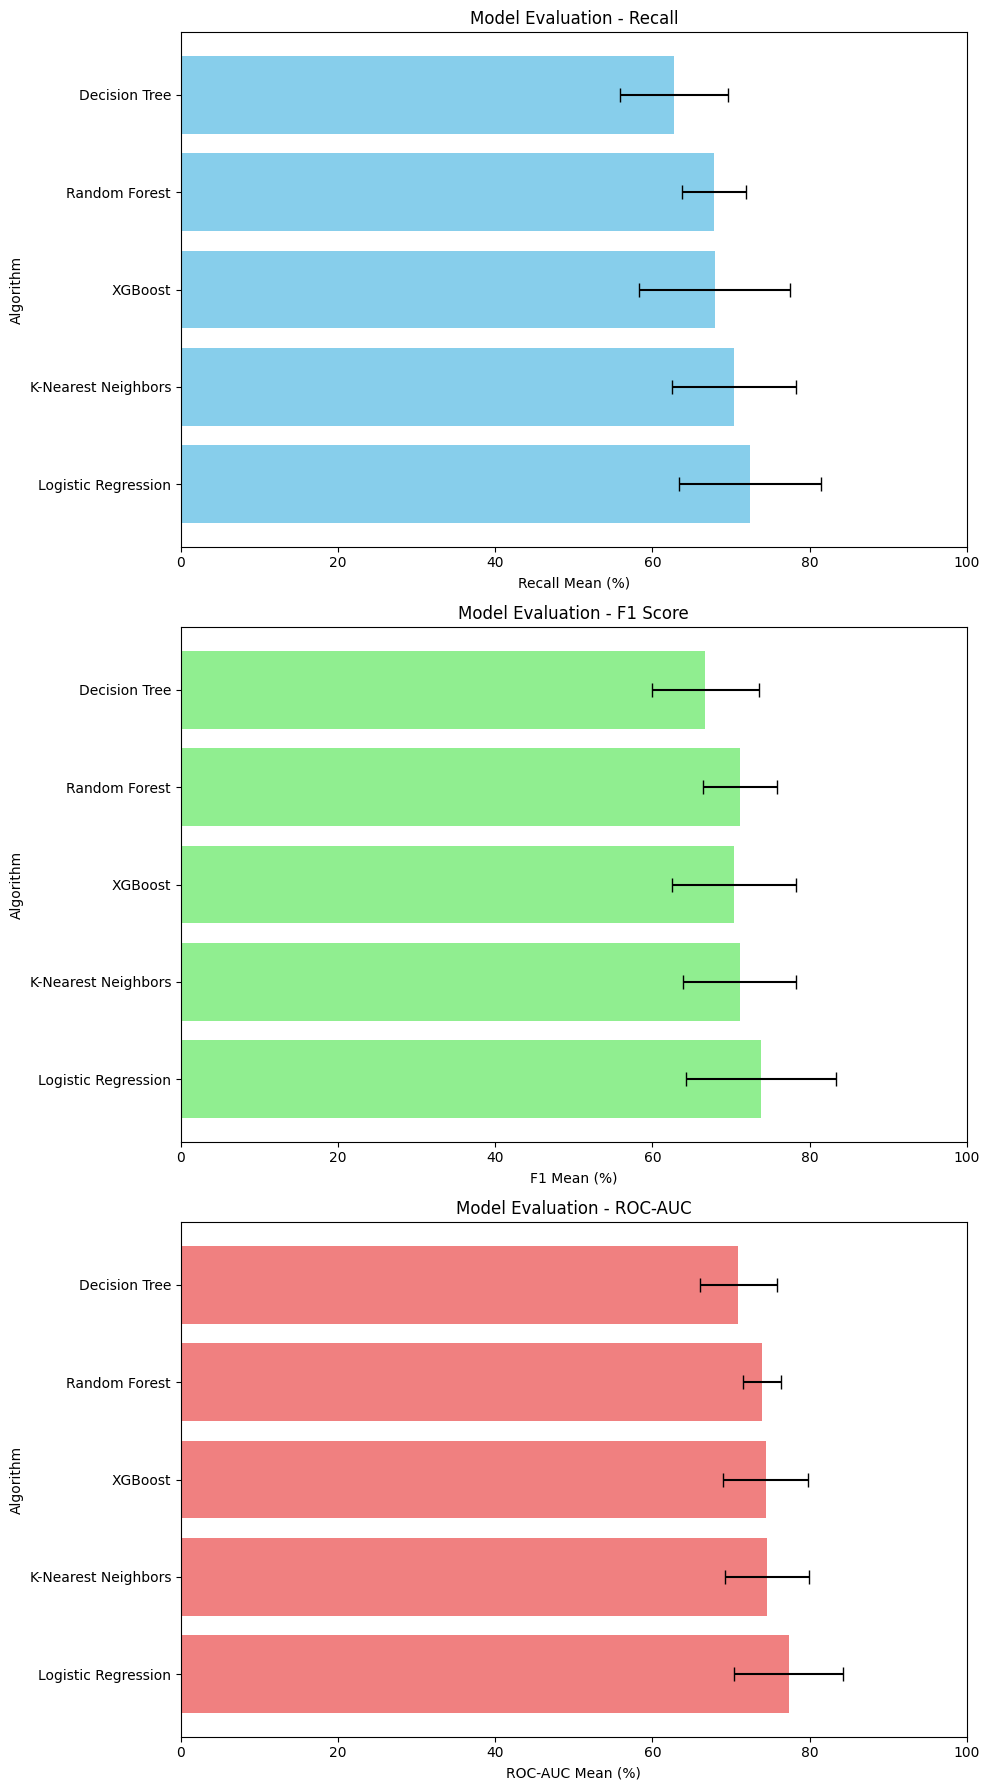

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import model_selection
from sklearn.metrics import recall_score, f1_score, roc_auc_score, make_scorer

# Define models
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('K-Nearest Neighbors', KNeighborsClassifier()))
models.append(('XGBoost', xgb.XGBClassifier()))

# Prepare results containers
recall_results = []
f1_results = []
roc_auc_results = []
names = []

# Define columns for the results dataframe
col = ['Algorithm', 'Recall Mean', 'Recall STD', 'F1 Mean', 'F1 STD', 'ROC-AUC Mean', 'ROC-AUC STD']
results_df = pd.DataFrame(columns=col)

# Assume X_train and y_train are already defined
# Example: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Evaluate model with k-fold Cross Validation
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)  # 10-fold Cross Validation
    
    # Cross-validation for recall
    cv_recall_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=make_scorer(recall_score))
    recall_results.append(cv_recall_results)
    
    # Cross-validation for F1 score
    cv_f1_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=make_scorer(f1_score))
    f1_results.append(cv_f1_results)
    
    # Cross-validation for ROC-AUC
    cv_roc_auc_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=make_scorer(roc_auc_score))
    roc_auc_results.append(cv_roc_auc_results)
    
    names.append(name)
    results_df.loc[i] = [name, round(cv_recall_results.mean()*100, 2),
                         round(cv_recall_results.std()*100, 2),
                         round(cv_f1_results.mean()*100, 2),
                         round(cv_f1_results.std()*100, 2),
                         round(cv_roc_auc_results.mean()*100, 2),
                         round(cv_roc_auc_results.std()*100, 2)]
    i += 1

# Sort the results by 'Recall Mean' in descending order
results_df.sort_values(by=['Recall Mean'], ascending=False, inplace=True)

# Plotting the results
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

# Recall bar chart
ax[0].barh(results_df['Algorithm'], results_df['Recall Mean'], xerr=results_df['Recall STD'], capsize=5, color='skyblue')
ax[0].set_title('Model Evaluation - Recall')
ax[0].set_xlabel('Recall Mean (%)')
ax[0].set_ylabel('Algorithm')
ax[0].set_xlim(0, 100)

# F1 Score bar chart
ax[1].barh(results_df['Algorithm'], results_df['F1 Mean'], xerr=results_df['F1 STD'], capsize=5, color='lightgreen')
ax[1].set_title('Model Evaluation - F1 Score')
ax[1].set_xlabel('F1 Mean (%)')
ax[1].set_ylabel('Algorithm')
ax[1].set_xlim(0, 100)


# ROC-AUC bar chart
ax[2].barh(results_df['Algorithm'], results_df['ROC-AUC Mean'], xerr=results_df['ROC-AUC STD'], capsize=5, color='lightcoral')
ax[2].set_title('Model Evaluation - ROC-AUC')
ax[2].set_xlabel('ROC-AUC Mean (%)')
ax[2].set_ylabel('Algorithm')
ax[2].set_xlim(0, 100)

plt.tight_layout()
plt.show()


## Logistic regression with sklearn

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Training the model

In [36]:
reg = LogisticRegression()

In [37]:
reg.fit(x_train,y_train)

LogisticRegression()

In [38]:
reg.score(x_train,y_train)

0.7857142857142857

### Manually check the accuracy

In [39]:
model_outputs = reg.predict(x_train)
model_outputs

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [40]:
y_train

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [41]:
model_outputs == y_train

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [42]:
np.sum((model_outputs==y_train))

440

In [43]:
model_outputs.shape[0]

560

In [44]:
np.sum((model_outputs==y_train)) / model_outputs.shape[0]

0.7857142857142857

### Finding the intercept and coefficients

In [45]:
reg.intercept_

array([-0.21805902])

In [46]:
reg.coef_

array([[ 2.05375976,  0.32940745,  1.55175598,  1.295456  ,  0.01975052,
         0.71290575, -0.20310607,  0.33288059, -0.1389948 ,  0.37910854,
        -0.31894076]])

In [47]:
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pet'], dtype=object)

In [48]:
feature_name = unscaled_inputs.columns.values

In [49]:
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)

summary_table['Coefficient'] = np.transpose(reg.coef_)

summary_table

,Feature name,Coefficient
0,Reason_1,2.053760
1,Reason_2,0.329407
2,Reason_3,1.551756
3,Reason_4,1.295456
4,Month Value,0.019751
5,Transportation Expense,0.712906
6,Age,-0.203106
7,Body Mass Index,0.332881
8,Education,-0.138995
9,Children,0.379109


In [50]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,-0.218059
1,Reason_1,2.053760
2,Reason_2,0.329407
3,Reason_3,1.551756
4,Reason_4,1.295456
5,Month Value,0.019751
6,Transportation Expense,0.712906
7,Age,-0.203106
8,Body Mass Index,0.332881
9,Education,-0.138995


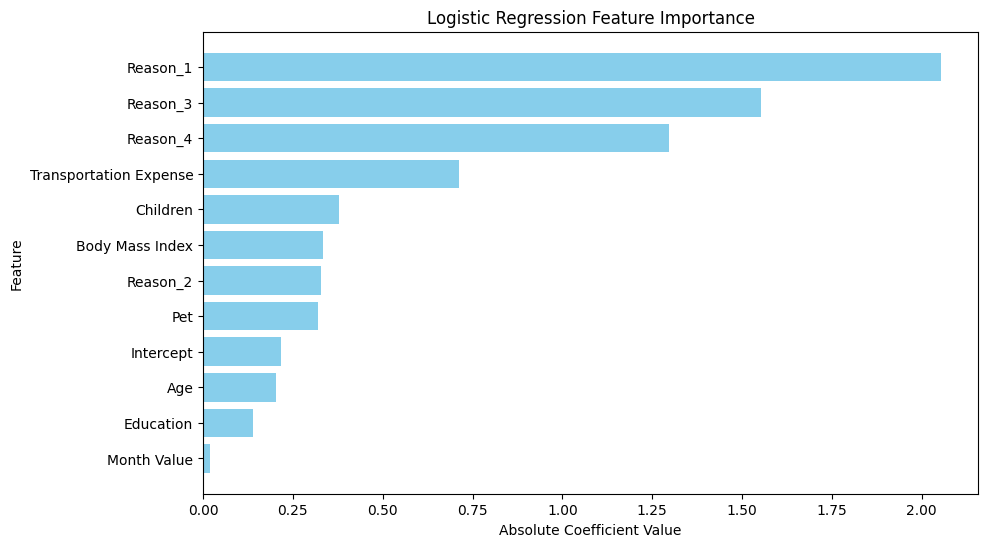

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature names and their corresponding coefficients
data = {
    'Feature name': ['Intercept', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 
                     'Month Value', 'Transportation Expense', 'Age', 
                     'Body Mass Index', 'Education', 'Children', 'Pet'],
    'Coefficient': [-0.218059, 2.053760, 0.329407, 1.551756, 1.295456, 
                    0.019751, 0.712906, -0.203106, 0.332881, -0.138995, 
                    0.379109, -0.318941]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Compute the absolute values of the coefficients to determine importance
df['Importance'] = df['Coefficient'].abs()

# Sort the DataFrame by importance
df = df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(df['Feature name'], df['Importance'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


## Interpreting the coefficients

In [52]:
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)

In [ ]:
summary_table

,Feature name,Coefficient,Odds_ratio
0,Intercept,-0.218059,0.804078
1,Reason_1,2.053760,7.797162
2,Reason_2,0.329407,1.390144
3,Reason_3,1.551756,4.719751
4,Reason_4,1.295456,3.652661
5,Month Value,0.019751,1.019947
6,Transportation Expense,0.712906,2.039910
7,Age,-0.203106,0.816192
8,Body Mass Index,0.332881,1.394981
9,Education,-0.138995,0.870233


In [53]:
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
1,Reason_1,2.053760,7.797162
3,Reason_3,1.551756,4.719751
4,Reason_4,1.295456,3.652661
6,Transportation Expense,0.712906,2.039910
10,Children,0.379109,1.460982
8,Body Mass Index,0.332881,1.394981
2,Reason_2,0.329407,1.390144
5,Month Value,0.019751,1.019947
9,Education,-0.138995,0.870233
7,Age,-0.203106,0.816192


## Testing the model

In [54]:
reg.score(x_test,y_test)

0.7285714285714285

In [56]:
predicted_proba = reg.predict_proba(x_test)
predicted_proba

array([[0.75419772, 0.24580228],
       [0.59585028, 0.40414972],
       [0.4459363 , 0.5540637 ],
       [0.76179054, 0.23820946],
       [0.06685395, 0.93314605],
       [0.28106341, 0.71893659],
       [0.29012732, 0.70987268],
       [0.07130711, 0.92869289],
       [0.7464439 , 0.2535561 ],
       [0.75747164, 0.24252836],
       [0.47933931, 0.52066069],
       [0.15452665, 0.84547335],
       [0.03565258, 0.96434742],
       [0.72907287, 0.27092713],
       [0.22721519, 0.77278481],
       [0.50950968, 0.49049032],
       [0.47786365, 0.52213635],
       [0.48524527, 0.51475473],
       [0.36570263, 0.63429737],
       [0.0340704 , 0.9659296 ],
       [0.74194102, 0.25805898],
       [0.76179054, 0.23820946],
       [0.47413086, 0.52586914],
       [0.46823712, 0.53176288],
       [0.15662496, 0.84337504],
       [0.74756148, 0.25243852],
       [0.49018941, 0.50981059],
       [0.8993592 , 0.1006408 ],
       [0.16217057, 0.83782943],
       [0.76179054, 0.23820946],
       [0.

In [57]:
predicted_proba.shape

(140, 2)

In [58]:
predicted_proba[:,1]

array([0.24580228, 0.40414972, 0.5540637 , 0.23820946, 0.93314605,
       0.71893659, 0.70987268, 0.92869289, 0.2535561 , 0.24252836,
       0.52066069, 0.84547335, 0.96434742, 0.27092713, 0.77278481,
       0.49049032, 0.52213635, 0.51475473, 0.63429737, 0.9659296 ,
       0.25805898, 0.23820946, 0.52586914, 0.53176288, 0.84337504,
       0.25243852, 0.50981059, 0.1006408 , 0.83782943, 0.23820946,
       0.39846673, 0.73072911, 0.72722468, 0.52361162, 0.23820946,
       0.63729175, 0.25467694, 0.84709916, 0.45542601, 0.63049413,
       0.23713803, 0.47201318, 0.25021316, 0.10842763, 0.83589641,
       0.68630226, 0.73514437, 0.24036228, 0.2455922 , 0.23606993,
       0.48381645, 0.06564283, 0.71893659, 0.24015537, 0.847291  ,
       0.40700098, 0.94692247, 0.25223161, 0.08047104, 0.08090969,
       0.71143335, 0.72250736, 0.25559231, 0.84724115, 0.23446034,
       0.24470767, 0.01192714, 0.25580104, 0.83847784, 0.2756246 ,
       0.24800092, 0.07771159, 0.91090465, 0.45249436, 0.63180

## Save the model

In [59]:
import pickle

In [60]:
with open('model', 'wb') as file:
    pickle.dump(reg, file)

In [61]:
with open('scaler','wb') as file:
    pickle.dump(absenteeism_scaler, file)